
# Project: The Movie Database Data Report

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Hi there, 
>> Today we are exploring a dataset from the movie database to answer some research questions while having fun because who doesn't love movies?!.
>>> This data set has 21 columns namely; id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, 	genres,	production_companies,	release_date,	vote_count,	vote_average,	release_year, budget_adj and revenue_adj. I know that you are probably wondering why there is revenue and revenue_adj column, the columns ending with 'adj' show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for the inflation over time.	


### Question(s) for Analysis
> Before we begin this report, we first need to come up with questions we would like to answer in the course of this report. Below are the questions we would be exploring over the course of this report


>>**Question 1 How many movies were made every year?**
>>>**Question 2 How many movies are in each genre?**
>>>> Now, let us dive into upgrades and import of necessary libraries

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [2]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [3]:
!pip install -U matplotlib

Requirement already up-to-date: matplotlib in /opt/conda/lib/python3.6/site-packages (3.3.4)


In [4]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from collections import Counter
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling
> Now that we are done with upgrades and imports, we have to read in the  dataset to familarize ourselves with it.

### General Properties
> After that, we will look at the properties of this dataset.

In [5]:
# Load data
data = pd.read_csv('tmdb-movies.csv')

#### Display Top 10 Rows of the Dataset

In [6]:
# code to display the top rows of the dataset
data.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

> The output above shows the top 10 rows of each column in the dataset

#### Display Last 10 Rows of the Dataset

In [7]:
#code to display the last rows of the dataset
data.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,...,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,...,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,...,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


#### Shape of the Dataset ( Number of rows and Number of columns)

In [8]:
# code to show shape
data.shape

(10866, 21)

In [9]:
print('The number of rows in the dataset is', data.shape[0])
print('The number of columns in the dataset is', data.shape[1])

The number of rows in the dataset is 10866
The number of columns in the dataset is 21


> Now we know that there are 21 columns and 10866 rows in this dataset

#### Information about the dataset like datatype of each column, memory size, total number of non-null values in each column, total number of rows and columns

In [10]:
# code to get necessary information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> The output above shows the number of non-missing values for each column, the momery usage of the dataset, data types amongst others.
>> We would have to do somethig about those missing values right?

#### Check for missing values in the dataset

In [11]:
# code for checking for missing values
missing_values = data.isnull().values.any()
print('Are there any missing values?', missing_values)

Are there any missing values? True


> There are missing values in the dataset, let look at the columns that have the missing values.

In [12]:
# columns with missing values
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> The output oabove shows that imdb_id has 10 missing values, cast column has 76 missing values, 7930 values are missing from homepage column, director column has 44 missing values, 2824 values are missing from cast, 1493 values are missing from keywords, 4 values are missing from overvie, genre has 23 missing columns and production_companies has 1030 missing values.

>> Let us look at this missing values in percentages

In [13]:
# find missing values in percentages
per_missing = data.isnull().sum()*100/len(data)
per_missing

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

> Approximated to 1 decimal place, the following are the breakdown of the missing values in percentage.
imdb_id- 0.1%, cast-0.7%, homepage-73.0%, director-0.4%, tagline-26.0%, keywords-13.7%, overview-0.04%, genre-0.21% and production_companies-9.5%

#### Overall statistics of the dataset

In [14]:
data.describe(include="all")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://phantasm.com,Woody Allen,Based on a true story.,...,No overview found.,NaN,Drama,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


> from the output above, the maximun popularity value is 33.0 and the minimun value 0.000065, the longest runtime is 900 minutes and the shortest runtime is 0.00 minutes.

#### Check for Duplicates

In [15]:
dup_data = data.duplicated().any()
print('Are there any duplicated values?', dup_data)

Are there any duplicated values? True


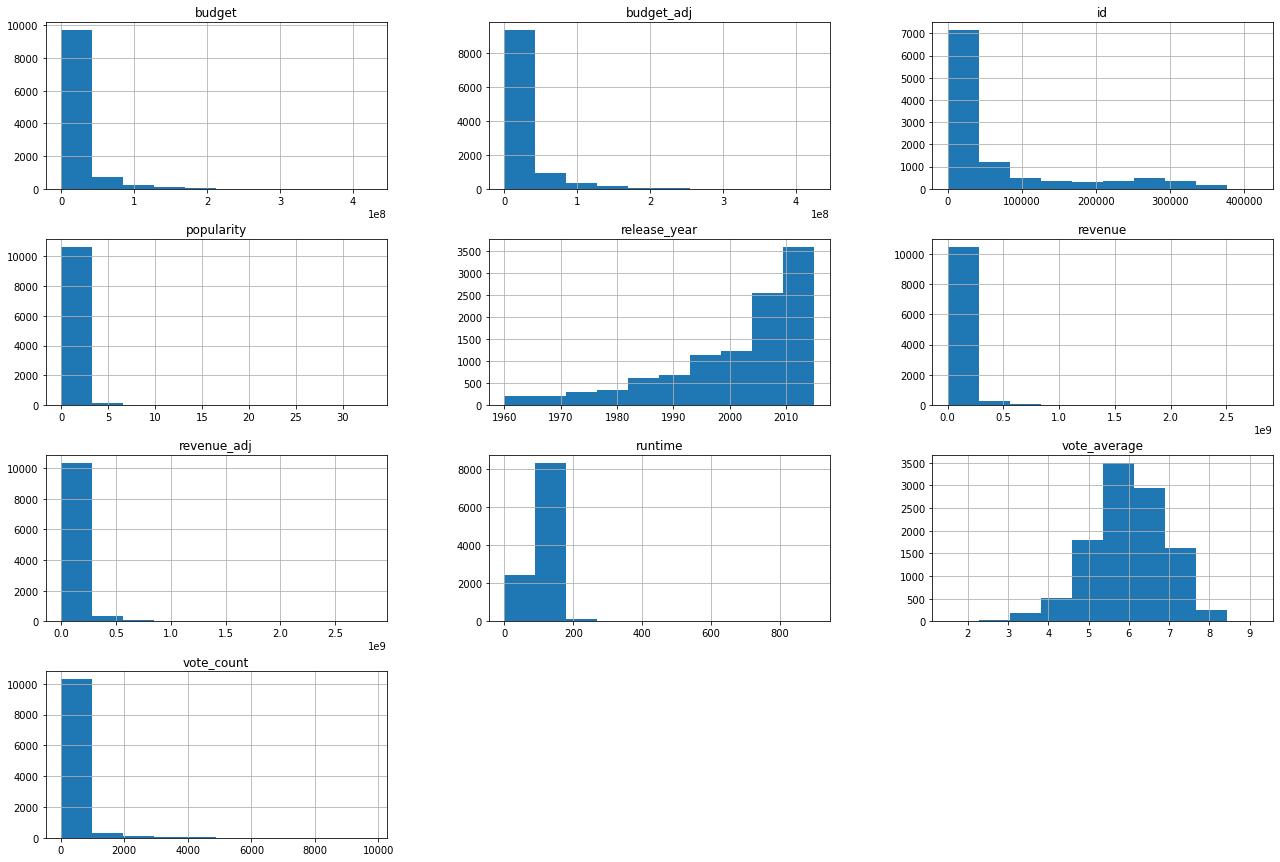

In [16]:
# Visualize the dataset
data.hist(figsize = (22,15));

> The output above shows that release_year is left skewed, vote_average is left skewed, adjusted revenue and adjusted revenue are right skewed.


### Data Cleaning
> Let us clean the dataset by droping duplicates, rows with missing values and columns that are not necessary for our report

In [17]:
#Drop rows with missing values
data.dropna(axis=0, inplace = True)

In [18]:
#Drop duplicates
data = data.drop_duplicates()

In [19]:
# Drop columns that are not needed 
data.drop(['id', 'imdb_id', 'homepage', 'overview', 'tagline', 'overview', 'vote_count' ], axis = 1, inplace = True )

<a id='eda'></a>
## Exploratory Data Analysis

> Now we are ready to explore and create visualizations. Come on!!






### Research Question 1 (Number of Movies Per Year)

In [20]:
# we look at the columns to use the proper name and capitalization
data.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

> To answer our question, we are goung to use the release_year column and a countplot

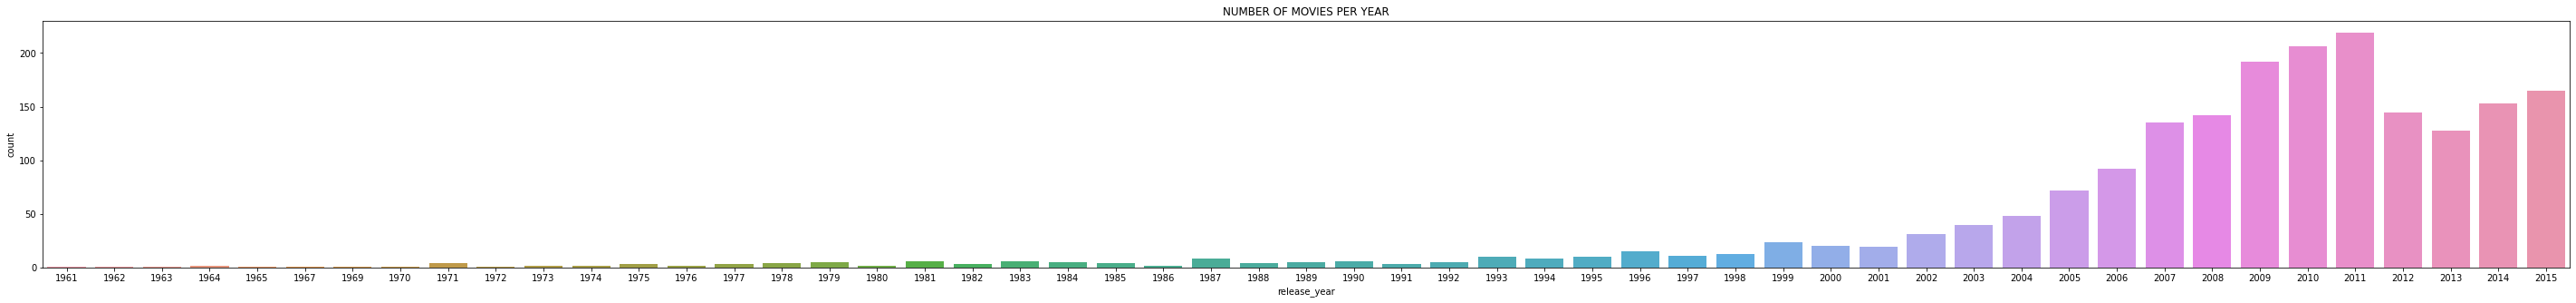

In [21]:
data['release_year'].value_counts()
plt.figure(figsize=(50,5))
sns.countplot(x='release_year', data=data)
plt.title('NUMBER OF MOVIES PER YEAR')
plt.show()

> The image above shows the number of movies made from the minimum release year to the maximum which is from 1960 to 2015 making a total of 55years.

#### Which release_year has the highest vote average?
> let's find out

In [22]:
data.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

> We would be using two columns to answer this. Vote Average and Release Year. 

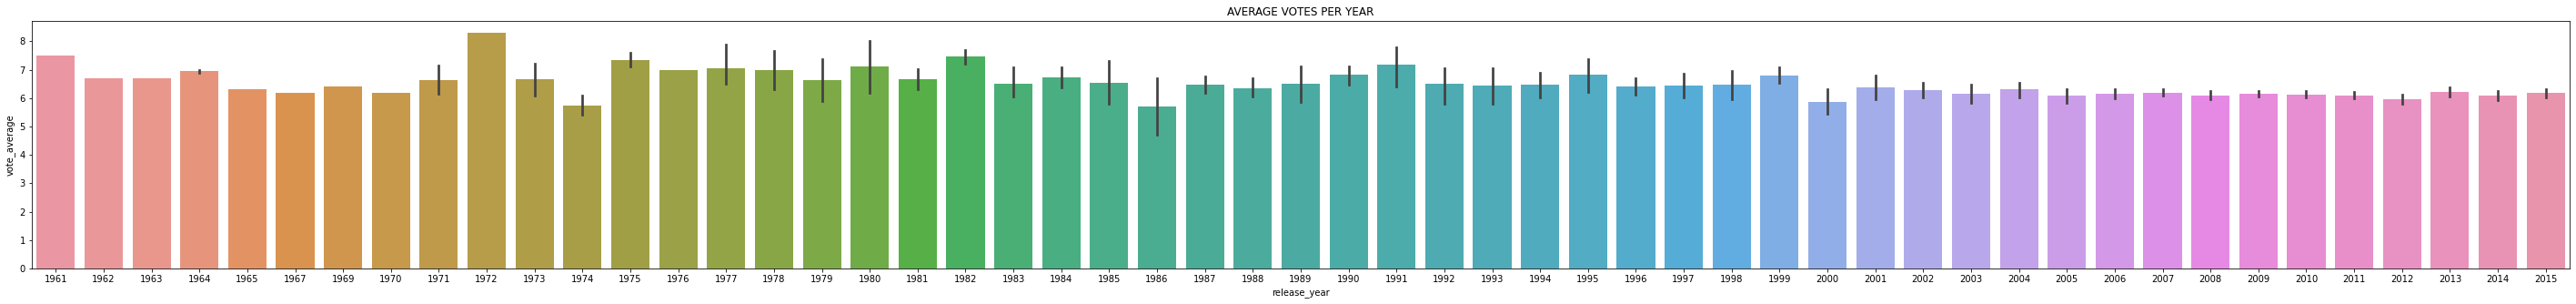

In [23]:
data.groupby('release_year') ['vote_average'].mean().sort_values(ascending=False)

# select size
plt.figure(figsize=(50,5))

# visualize with a barplot
sns.barplot(x='release_year', y='vote_average', data=data)

# add title
plt.title('AVERAGE VOTES PER YEAR')
plt.show()

The output above shows the average vote for every year.

**Should we classify movies based on average votes using give remarks like Excellent, Good and Average?**
>>>let us do just that!!

In [24]:
# create a function
def average_vote(average_vote):
    if average_vote >= 7.0:
        return 'Excellent'
    elif average_vote >= 6.0:
        return 'Good'
    else:
        return 'Average'

In [25]:
# apply the function to the dataset and create a new column name
data['average_vote_remarks'] = data['vote_average'].apply(average_vote)

In [26]:
data.head(20)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,average_vote_remarks
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,Good
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,Excellent
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,1.012000e+08,2.716190e+08,Good
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,1.839999e+08,1.902723e+09,Excellent
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015,1.747999e+08,1.385749e+09,Excellent
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,7.2,2015,1.241999e+08,4.903142e+08,Excellent
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,5.8,2015,1.425999e+08,4.053551e+08,Average
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,7.6,2015,9.935996e+07,5.477497e+08,Excellent
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,6.5,2015,6.807997e+07,1.064192e+09,Good
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,8.0,2015,1.609999e+08,7.854116e+08,Excellent


> Did you see the new column that was created?

#### Can we tell the Average Popularity of Movies per Year?

> let us find out!

In [27]:
data.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'average_vote_remarks'],
      dtype='object')

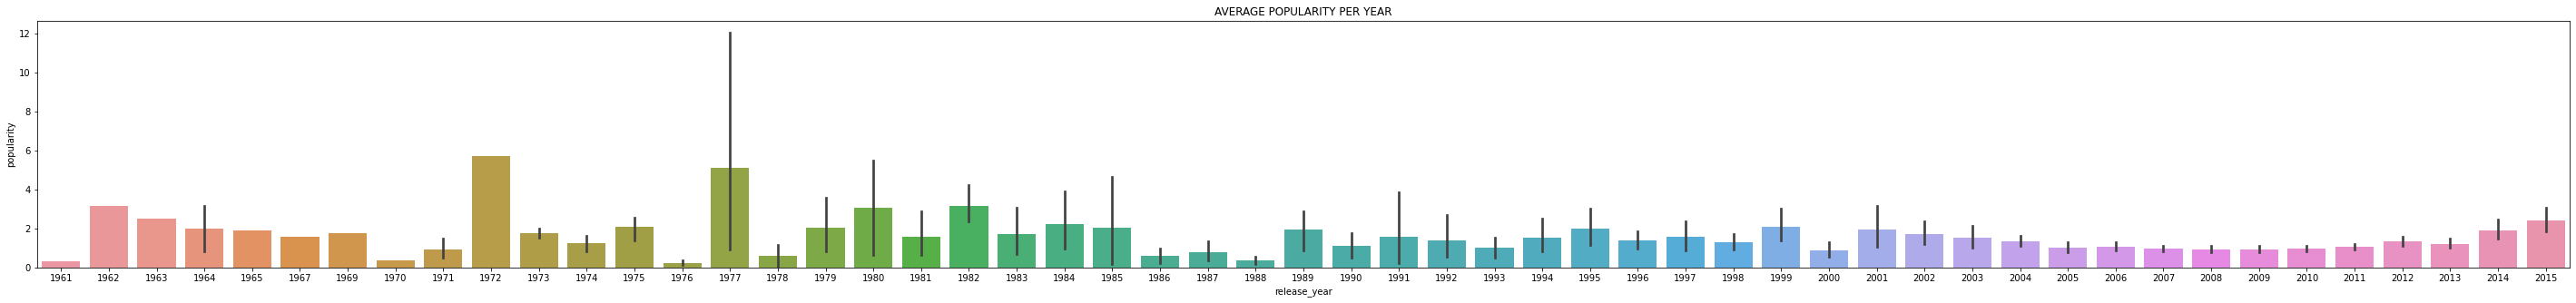

In [28]:
avg_pop_per_year = data.groupby('release_year')['popularity'].mean().sort_values(ascending=False)

# select size
plt.figure(figsize=(50,5))

# visualize with a barplot
sns.barplot(x='release_year', y='popularity', data=data)

# add label
plt.title('AVERAGE POPULARITY PER YEAR')
plt.show()

> Now we can tell the average popularity for every year

#### Here I am, wondering the top 10 most popular movies and their Directors
> let us use a barplot to figure that out!

In [29]:
data.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'average_vote_remarks'],
      dtype='object')

In [30]:
# set title as index
top_10_pop = data.nlargest(10, 'popularity')[['original_title','popularity', 'director']].set_index('original_title')

#print
top_10_pop

,popularity,director
original_title,,
Jurassic World,32.985763,Colin Trevorrow
Mad Max: Fury Road,28.419936,George Miller
Interstellar,24.949134,Christopher Nolan
Guardians of the Galaxy,14.311205,James Gunn
Insurgent,13.112507,Robert Schwentke
Captain America: The Winter Soldier,12.971027,Joe Russo|Anthony Russo
Star Wars,12.037933,George Lucas
John Wick,11.422751,Chad Stahelski|David Leitch
Star Wars: The Force Awakens,11.173104,J.J. Abrams


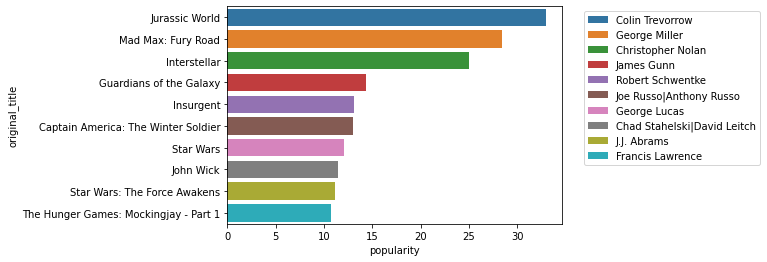

In [31]:
#visaulize using a barplot
sns.barplot(x='popularity', y=top_10_pop.index, data=top_10_pop, hue='director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.show()


> The most popular movie is Jurassic world and it was directed by Colin Trevorrow

**I bet you are wondering if popularity affects revenue**
>***A scatter plot will help us to find out***

In [32]:
data.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'average_vote_remarks'],
      dtype='object')

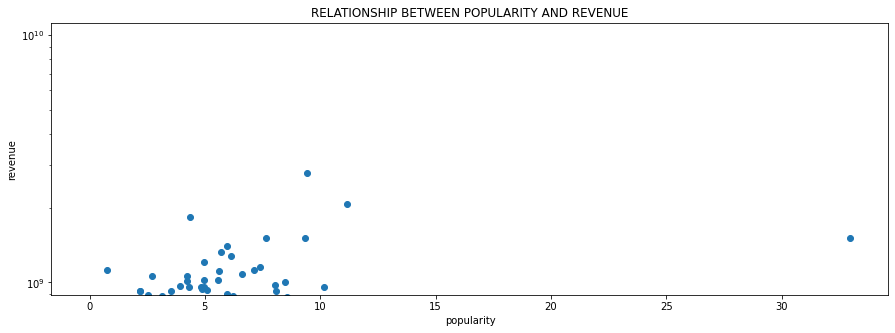

In [33]:
# select figure size
plt.figure(figsize=(15,5))

# use a scatterplot
plt.scatter(x='popularity', y='revenue', data=data)

# reduce the range of the revenue column using a logarithmic scale
plt.yscale('log')

# add title
plt.title('RELATIONSHIP BETWEEN POPULARITY AND REVENUE')

#add label
plt.xlabel('popularity')
plt.ylabel('revenue')


plt.show()

 > The plot above shows a positive correlation between revenue and popularity. That ia as popularity increases, revenue increases.

### Research Question 2  (How many Movies are in each Genre)

> To answer the above question, let us look at the genre column

In [34]:
data.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'average_vote_remarks'],
      dtype='object')

In [35]:
data['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10724                    Adventure|Action|Thriller
10759                              Horror|Thriller
10760                                       Comedy
10817                            Documentary|Music
10819                                Action|Comedy
Name: genres, Length: 1992, dtype: object

In [36]:
# use the explode function to split the genre column
genre_df = data.assign(genres=data['genres']. str.split('|')).explode('genres')

In [37]:
# count the number of movies in each genre
movies_per_genre = genre_df['genres'].value_counts()

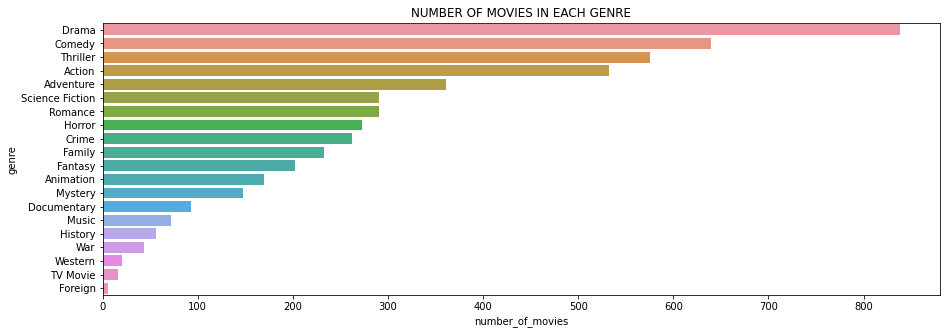

In [38]:
# select figure size
plt.figure(figsize=(15,5))

sns.barplot(x=movies_per_genre, y=movies_per_genre.index);

# add title
plt.title('NUMBER OF MOVIES IN EACH GENRE')

# add label to the y axis
plt.ylabel('genre')
plt.xlabel('number_of_movies')
plt.show()


<a id='conclusions'></a>
## Conclusions

> Finally!
 We have gotten to the conclusion of our report guys!!
 >> This was fun!. We use countplot to visualize the number of movies that were made every year with a timeline of 55 years having 1960 as the minimum year and 2015 as the maximum year. We visualized the average popularity per year, created a new column with remarks on the vote_average, visualized the top 10 most popular movie titles ant their directors. We deduced a positive correlation between popularity and revenue using a scatterplot.
  
  >> Lastly, We used a barplot to show the number of movies in each genre.
  
## Limitations
>> The limitation I encountered in this report is the missing data which reduced our sample size

## References
(https://www.youtube.com/watch?v=Asm2_qgBK48&t=892s)

(https://www.easytweaks.com/empty-dataframe-pandas-columns/)

(https://note.nkmk.me/en/python-pandas-dataframe-rename/#:~:text=You%20can%20use%20the%20rename,change%20column%2Findex%20name%20individually.&text=Specify%20the%20original%20name%20and,is%20for%20the%20index%20name)

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0